In [1]:
# Import the necessary libraries 
import pandas as pd
import seaborn as sns


In [2]:
# Load a CSV file into a Pandas DataFrame
df = pd.read_csv("datos_limpios_Empresas.csv")

In [3]:
df

,NIT,RAZÓN_SOCIAL,SUPERVISOR,DEPARTAMENTO_DOMICILIO,CIUDAD_DOMICILIO,MACROSECTOR,INGRESOS_OPERACIONALES,GANANCIA_PÉRDIDA,TOTAL_ACTIVOS,TOTAL_PASIVOS,TOTAL_PATRIMONIO
0,899999068,ECOPETROL S.A,SUPERFINANCIERA,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,MINERO,144.82,33.41,216.85,125.81,91.03
1,900112515,REFINERIA DE CARTAGENA S.A.S,SUPERSOCIEDADES,BOLIVAR,CARTAGENA-BOLIVAR,MANUFACTURA,27.86,2.19,42.84,16.48,26.36
2,830095213,ORGANIZACIÓN TERPEL S.A.,SUPERFINANCIERA,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,COMERCIO,23.60,0.33,7.48,4.47,3.01
3,860069804,CARBONES DEL CERREJON LIMITED,SUPERSOCIEDADES,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,MINERO,16.39,6.05,10.45,9.00,1.45
4,800021308,DRUMMOND LTD,SUPERSOCIEDADES,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,MINERO,15.27,2.16,14.27,6.34,7.93
...,...,...,...,...,...,...,...,...,...,...,...
29993,800215707,SERVICIOS Y PROCESOS SERPRO SAS,SUPERSOCIEDADES,BOGOTA D.C.,"BOGOTA, D.C.-BOGOTA D.C.",COMERCIO,0.02,0.00,0.01,0.01,0.01
29994,900895431,TEMPORAL ACTIVA S.A.S,SUPERSOCIEDADES,SANTANDER,FLORIDABLANCA-SANTANDER-SANTANDER,SERVICIOS,0.02,0.00,0.01,0.00,0.01
29995,900208659,DAMIS S.A.S,SUPERSOCIEDADES,VALLE,YUMBO-VALLE-VALLE,MANUFACTURA,0.02,0.00,0.02,0.01,0.01
29996,901097082,DISTRIBUCIONES NUEVO HORIZONTE DEL CASANARE S....,SUPERSOCIEDADES,CASANARE,YOPAL-CASANARE-CASANARE,COMERCIO,0.02,0.00,0.00,0.00,0.00


In [4]:
# Return a tuple representing the dimensionality of the DataFrame.
# First value  = Number of Rows including the header.
# Second value = Number of Columns.
df.shape


(29998, 11)

In [7]:
# Get the table for the column CANTIDAD and GENERO
df.groupby('MACROSECTOR')['INGRESOS_OPERACIONALES'].sum().reset_index()


,MACROSECTOR,INGRESOS_OPERACIONALES
0,AGROPECUARIO,102.16
1,COMERCIO,1473.18
2,CONSTRUCCIÓN,183.07
3,MANUFACTURA,1116.31
4,MINERO,622.58
5,SERVICIOS,1445.24


In [ ]:

# Creates a bar chart where the bars show the total sum of the "CANTIDAD" (deaths, for example) for each value of "GENERO"
# The possible values ​​for the estimator parameter are: mean, sum, count, std
sns.barplot(data=df, x="MACROSECTOR", y="INGRESOS_OPERACIONALES", estimator=sum)


In [8]:
# Get the table for the column ARMAS_MEDIOS and GENERO
df.groupby('DEPARTAMENTO_DOMICILIO')['INGRESOS_OPERACIONALES'].sum().reset_index()


,DEPARTAMENTO_DOMICILIO,INGRESOS_OPERACIONALES
0,AMAZONAS,0.37
1,ANTIOQUIA,813.54
2,ARAUCA,2.30
3,ATLANTICO,223.28
4,BOGOTA D.C.,2691.62
5,BOLIVAR,193.98
6,BOYACA,15.40
7,CALDAS,42.29
8,CAQUETA,2.66
9,CASANARE,4.57


<Axes: xlabel='DEPARTAMENTO_DOMICILIO', ylabel='INGRESOS_OPERACIONALES'>

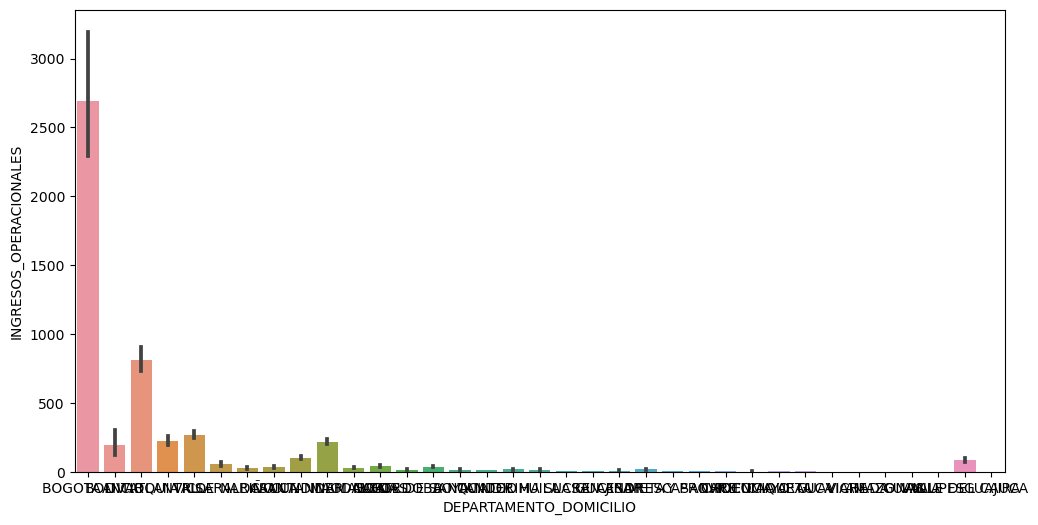

In [9]:
import matplotlib.pyplot as plt

# Create a shape with a specific size (height and width)
plt.figure(figsize=(12, 6))

# Creates a bar chart where the bars show the total sum of the "CANTIDAD" (deaths, for example) for each value of "ARMAS_MEDIOS"
sns.barplot(data=df, x="DEPARTAMENTO_DOMICILIO", y="INGRESOS_OPERACIONALES", estimator=sum)

In [10]:
# Get the table for the column GRUPO_ETARIO and GENERO
df.groupby('MACROSECTOR')['INGRESOS_OPERACIONALES'].sum().reset_index()

,MACROSECTOR,INGRESOS_OPERACIONALES
0,AGROPECUARIO,102.16
1,COMERCIO,1473.18
2,CONSTRUCCIÓN,183.07
3,MANUFACTURA,1116.31
4,MINERO,622.58
5,SERVICIOS,1445.24


<Axes: xlabel='MACROSECTOR', ylabel='INGRESOS_OPERACIONALES'>

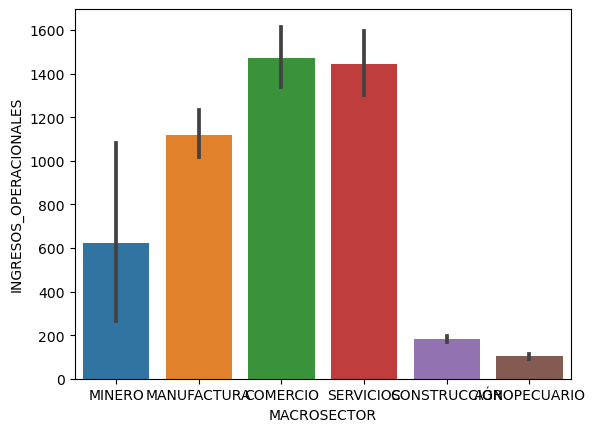

In [11]:
# Creates a bar chart where the bars show the total sum of the "CANTIDAD" (deaths, for example) for each value of "GRUPO_ETARIO"
sns.barplot(data=df, x="MACROSECTOR", y="INGRESOS_OPERACIONALES", estimator=sum)